# Assignment 2


Students: Clara Louise Brodt (s224189) & Celina Laungaard (s234809)

Course: Social Computational Science (02467)
GitHub link: https://github.com/claralb2002/Social-Computational-Science-Assignment-1.git 

(Link is correct, look in folder "Assignment 2")

| Contribution| Celina | Clara |
| --- | --- | --- |
| Part 1 | 50% | 50% |
| Part 2 | 50% |50% |
| Part 3 | 50% | 50% |


In [40]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json

np.random.seed(333)


## Part 1: Properties of the real-world network of Computational Social Scientists

These exercises are taken from Week 5. Please note that 2 Degree distribution is taken out and 3 Shortest paths is numbered 2 here.
> __Exercise 1: Analyzing Networks through a Random Model__ 
>
>
>
> 1. _Random Network_: Let's start by building a Random Network, acting as a baseline (or ["null model"](https://en.wikipedia.org/wiki/Null_model)) to understand the Computational Social Scientists Network better.  
> * First, calculate the probability (_p_) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding _p_, figure out the average degree (using the given formula). 
> * Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated _p_. Generate a random network by linking nodes in every possible pair with probability _p_. **Hint**: you can use the function [``np.random.uniform``](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) to draw samples from a uniform probability distribution.   
> * Visualize the network as you did for the Computational Social Scientists network in the exercise above (my version is below). 
>


In [66]:
# Load network
with open("final_network.json") as f:
    data = json.load(f)

# Extract nodes and links manually
nodes = data["nodes"]
edges = data["links"]

# Count nodes and edges
N = len(nodes)
L = len(edges)

print(f"Number of nodes (N): {N}")
print(f"Number of actual edges (L_actual): {L}")



Number of nodes (N): 14760
Number of actual edges (L_actual): 59432


We calculate probability by using equation 3.2:
$$
\langle L \rangle = p \cdot \frac{N(N-1)}{2}
$$
Isolate for $p$
$$
p = \frac{2L}{N(N-1)}
$$

In [3]:
# Calculate probability 
p = (2 * L) / (N * (N - 1))

print(f"Calculated probability p = {p:.4f}")

Calculated probability p = 0.0005


Calculates average degree by using equation 3.3
$$
\langle k \rangle = p(N-1)
$$

In [4]:
# Calculate average degree 

k = p * (N - 1)

print(f"Average degree k = {k:.4f}")

Average degree k = 7.8713


In [5]:
# Function to generate random network using calculated p and N

G_random = nx.gnp_random_graph(N, p, seed = 333)

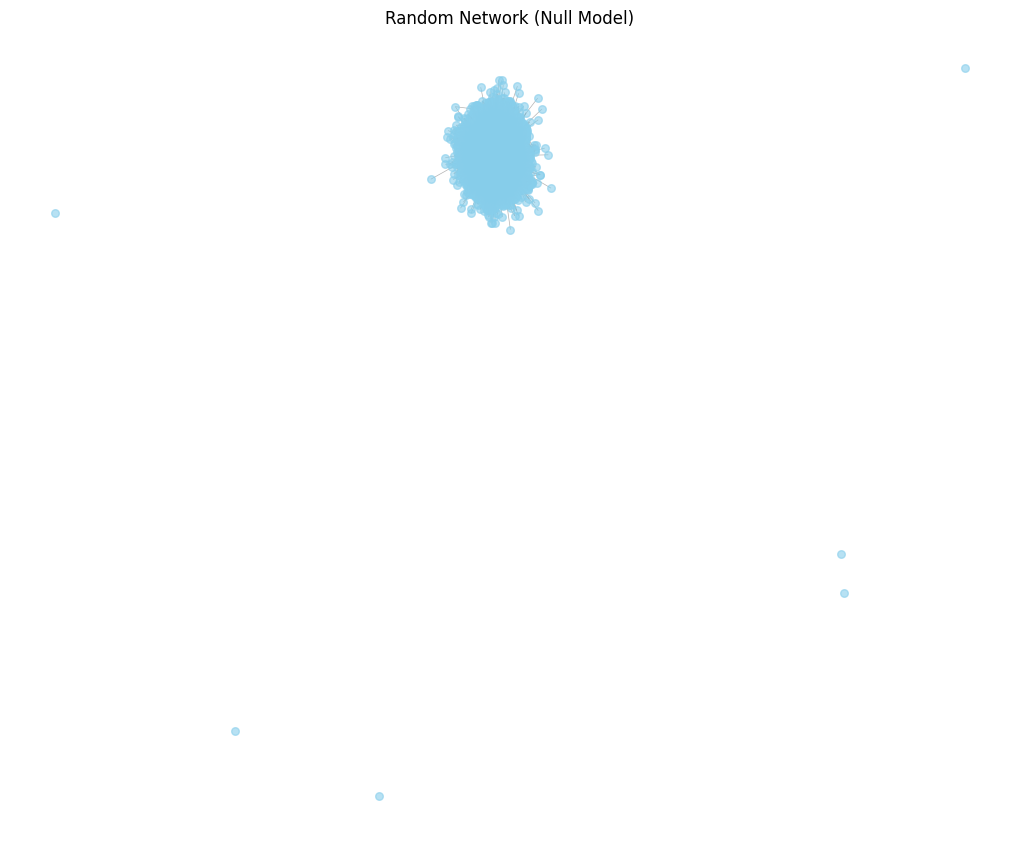

In [6]:
# Visualize the new network

def visualize_network(G):
    pos = nx.spring_layout(G, seed=333) 
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, node_size=30, node_color='skyblue', edge_color='gray', width=0.5, alpha=0.6, with_labels=False)
    plt.title("Random Network (Null Model)")
    plt.axis('off')
    plt.show()

visualize_network(G_random)

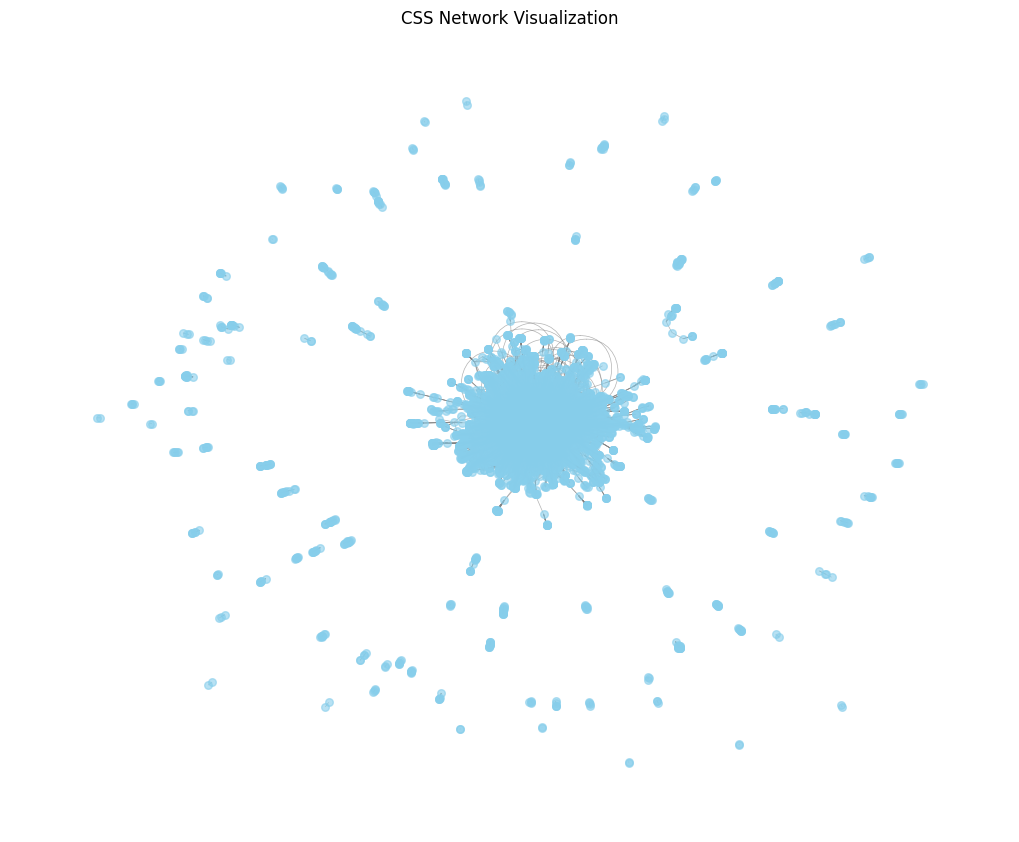

In [69]:
# Visualize the Computation Neural Network

# Load network
with open("final_network.json") as f:
    data = json.load(f)

# Extract nodes and links manually
nodes = data["nodes"]
edges = data["links"]

# Create graph
G = nx.Graph() 

# Add nodes 
for node in nodes:
    node_id = node["id"]  
    G.add_node(node_id, **node) 

# Add edges
for edge in edges:
    source = edge["source"]
    target = edge["target"]
    G.add_edge(source, target, **edge) 

# Visualize the network
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, node_size=30, node_color='skyblue', edge_color='gray', width=0.5, alpha=0.6, with_labels=False)
plt.title("CSS Network Visualization")
plt.axis('off')
plt.show()


> * Answer the following questions __(max 200 words in total)__: 
>    - What regime does your random network fall into? Is it above or below the critical threshold?  




*Our k is larger than 1, and according to section 3.6 in the networksciencebook.com, that falls into the supercritical regime where $\langle k \rangle > 1$ and $p > 1/N$. Since the critical threshold is $\langle k \rangle = 1$, then it is above the critical threshold. When it is above the critical threshold, it means that the network probably contains a giant connected component, as a cluster that spans a significant part of the nodes, as seen in the visualization above.*


>    - According to the textbook, what does the network's structure resemble in this regime?  

*As $\langle k \rangle$ expands beyond the critical point, the giant component grows, drawing in more nodes. However, we still se a lot of isolated components, forming a tree, while the giant component in the top contains loops and cycles. This is characterized by a nonlinear relationship relationship between the average defree and the size of the large compontent, specially when $\langle k \rangle$ becomes bigger.*


>    - Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.


*The visualization of the random network shows a single giant component surrounded by several small, disconnected clusters and isolated nodes. This matches theoretical expectations for Erdős–Rényi graphs in the supercritical regime — low clustering, no community structure, and a random, uniform pattern. In contrast, the actual CSS network shows a densely connected core with many smaller clusters extending outward, indicating strong community structure and likely high clustering. The key visual difference is that the actual network has an organized, modular layout, while the random network appears structureless. These differences are fully consistent with theory.*


> 2. _Shortest Paths_: Here, we will check if the Computational Social Scientists Network exhibits characteristics of a small-world network by analyzing its shortest paths.
> * Begin by identifying the largest connected component within the Computational Social Scientists network. Recall that a connected component is a subset of nodes in which every pair of nodes is connected by a path. For a refresher on connected components, see section 2.9 of the Network Science book. Follow these steps:
>    - Utilize [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to enumerate all connected components, which will be returned as a list of node subsets.
>    - Select the largest subset of nodes identified in the previous step. Then, create a subgraph of your original network that includes only these nodes, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This subset forms your largest connected component, sometimes referred to as the [giant component](https://en.wikipedia.org/wiki/Giant_component).
> * Calculate the average (unweighted) shortest path length within this giant component by employing [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html).
> * Perform the same calculation for the giant component of the random network you constructed in the above exercise 1.




In [7]:
# Convert to a NetworkX graph
G_css = nx.node_link_graph(data)

In [8]:
# Get all connected components
components = nx.algorithms.connected_components(G_css)

# Sort by size and select the largest one
largest_cc = max(components, key=len)

# Create a subgraph of the giant component
G_css_giant = G_css.subgraph(largest_cc).copy()
print(f"Size of giant component: {G_css_giant.number_of_nodes()} nodes, {G_css_giant.number_of_edges()} edges")


Size of giant component: 14163 nodes, 58124 edges


In [57]:
# Calculate average (unweighted) shortest path

avg_path = nx.average_shortest_path_length(G_css_giant)
print(f"Average shortest path length : {avg_path:.4f}")

Average shortest path length : 5.2130


In [10]:
# The same as above for the random network

# Convert to a NetworkX graph
G_random_network = G_random

# Get all connected components
components_random_network = nx.algorithms.connected_components(G_random_network)

# Sort by size and select the largest one
largest_cc_random_network = max(components_random_network, key=len)

# Create a subgraph of the giant component
G_random_network_giant = G_random.subgraph(largest_cc_random_network)

# Calculate average (unweighted) shortest path

avg_path_random_network = nx.average_shortest_path_length(G_random_network_giant)
print(f"Average shortest path length : {avg_path_random_network:.4f}")

Average shortest path lenth : 4.9044


> * Reflect on how the average shortest path lengths of the real and random networks compare and answer the following questions, supporting your answers with the theory from the book.
>   - Why do you think I asked you to consider the giant component only?

*Because the giant component includes only connected nodes, and shortest paths can only be computed between nodes that are reachable from one another. If we included disconnected nodes, the average shortest path length would either be undefined or infinite. By focusing on the giant component, we ensure that all node pairs have valid, finite shortest paths, making the analysis both meaningful and consistent.*


>   - Why do you think I asked you to consider unweighted edges?

*Using unweighted edges means we treat all connections equally, without considering any additional "cost" or "strength" associated with a link. This is important because we are interested in the topological closeness between nodes — that is, how many steps it takes to get from one node to another — rather than how strong or costly the connections are. It simplifies the analysis and aligns with standard definitions of small-world networks, which are typically based on unweighted structures.*


>   - Does the Computational Social Scientists network exhibit the small-world phenomenon?

*Yes. The Computational Social Scientists network exhibits the small-world phenomenon because its average shortest path length is relatively small and comparable to that of a random network of similar size (5.2130 vs. 4.9044). This suggests that, like other small-world networks, it allows for efficient communication between nodes. Although clustering is not seen here, since they all just lay in one big component, social networks typically also exhibit high clustering, which is another key characteristic of small-world networks.*


## Part 2 Network Analysis in Computational Social Science

These exercises are taken from Week 6: __Exercise 1: Mixing Patterns and Assortativity__ and __Exercise 3: Zachary's karate club__.

> __Exercise 1: Mixing Patterns and Assortativity__ 
>
> __Part 1: Assortativity Coefficient__ 
> 1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**
>


In [41]:
import json
import networkx as nx
import numpy as np

In [42]:
# Load the JSON file
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to NetworkX graph
G_loaded = nx.json_graph.node_link_graph(graph_data, directed=True)

In [43]:
# Ensure all nodes have a valid "country" attribute
for node in G_loaded.nodes:
    G_loaded.nodes[node]["country"] = G_loaded.nodes[node].get("country", "Unknown")

# Convert country names to numerical labels
list_of_countries = list(set(nx.get_node_attributes(G_loaded, "country").values()))
country_mapping = {country: i for i, country in enumerate(list_of_countries)}

# Apply the mapping directly to the graph
new_country_attributes = {}

for node in G_loaded.nodes:
    country_name = G_loaded.nodes[node]["country"]
    numeric_label = country_mapping[country_name]
    new_country_attributes[node] = {"country": numeric_label}

nx.set_node_attributes(G_loaded, new_country_attributes)

In [44]:
def assortativity_coefficient(G, attribute):
    """
    Compute the assortativity coefficient for a directed network based on a categorical node attribute.
    """
    edges = [(src, dst) for src, dst in G.edges if attribute in G.nodes[src] and attribute in G.nodes[dst]]

    # Extract numerical attribute values for each edge
    j_i = np.array([G.nodes[src][attribute] for src, dst in edges], dtype=np.float64)
    k_i = np.array([G.nodes[dst][attribute] for src, dst in edges], dtype=np.float64)

    M = len(j_i)  # Number of edges

    # Compute assortativity formula with improved numerical stability
    sum_jk = np.sum(j_i * k_i) / M
    sum_j = np.sum(j_i) / M
    sum_k = np.sum(k_i) / M
    sum_j2 = np.sum(j_i ** 2) / M
    sum_k2 = np.sum(k_i ** 2) / M

    numerator = sum_jk - sum_j * sum_k
    denominator = np.sqrt((sum_j2 - sum_j ** 2) * (sum_k2 - sum_k ** 2))

    return numerator / denominator if denominator != 0 else 0

# Compute assortativity coefficient
r = assortativity_coefficient(G_loaded, "country")
print("Manual Assortativity:", r)


Manual Assortativity: 0.3612285090925176


> __Part 2: Configuration model__
> In the following, we are going to assess the significance of the assortativity by comparing the network's assortativity coefficient against that of random networks generated through the configuration model.  
>
> 2. *Implement the configuration model* using the _double edge swap_ algorithm to generate random networks. Ensure each node retains its original degree but with altered connections. Create a function that does that by following these steps:
>   - **a.** Create an exact copy of your original network.
>   - **b.** Select two edges, $e_{1} = (u,v)$ and $e_{2} = (x,y)$, ensuring *u != y* and *v != x*.
>   - **c.** Flip the direction of $e_{1}$ to $e_{1} = (v,u)$ 50% of the time. This ensure that your final results is not biased, in case your edges were sorted (they usually are). 
>   - **d.** Ensure that new edges $e_{1}' = (e_{1}[0],e_{2}[1])$ and $e_{2}' = (e_{2}[0],e_{1}[1])$ do not already exist in the network.
>   - **e.** Remove edges $e_{1}$ and $e_{2}$ and add edges $e_{1}'$ and $e_{2}'$.
>   - **f.** Repeat steps **b** to **e** until you have performed _E*10_ swaps, where E is the total number of edges.


In [45]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

In [46]:
# Load the original network
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to a NetworkX graph
G_loaded = nx.node_link_graph(graph_data, directed=False)

In [47]:
def double_edge_swap(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()

    edges = set(G_copy.edges())  # Ensure edges are undirected
    E = len(edges)  # Number of edges
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in tqdm(range(num_swaps)):
        # Select two random edges (convert set to list first)
        edge_list = list(edges)  # Convert set to list for sampling
        e1, e2 = random.sample(edge_list, 2)
        u, v = e1
        x, y = e2

        # Randomly flip e1 direction to avoid sorting bias
        if random.random() < 0.5:
            u, v = v, u
        if random.random() < 0.5:
            x, y = y, x

        # Ensure valid swapping conditions
        if u != y and v != x and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
                # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [48]:
G_randomized = double_edge_swap(G_loaded)

100%|██████████| 594320/594320 [07:29<00:00, 1323.20it/s]



> 3. *Double check that your algorithm works well*, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.
>
>


In [49]:
# Verify that the degree distributions are identical
original_degrees = dict(G_loaded.degree())
randomized_degrees = dict(G_randomized.degree())
print(len(original_degrees),len(randomized_degrees))


# Compare degree distributions
degree_match = all(original_degrees[node] == randomized_degrees[node] for node in G_loaded.nodes())

print("Degree distribution preserved:", degree_match)

14760 14760
Degree distribution preserved: True


> __Part 3: Analyzing Assortativity in Random Networks__  
>
> 4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance.
>


In [50]:
import random
import itertools

def double_edge_swap_2(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()
    G_copy = G_copy.to_undirected()

    E = len(G_copy.edges())
    nodes = list(itertools.chain(*list(G_copy.edges())))
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in range(num_swaps): 
        x,u = random.sample(nodes,2)
        v = random.choice(list(G[u]))
        y = random.choice(list(G[x]))

        if u != y and x != v and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
            # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [51]:
G_randomized = double_edge_swap_2(G_loaded)

In [52]:
# Verify that the degree distributions are identical
original_degrees = dict(G_loaded.degree())
randomized_degrees = dict(G_randomized.degree())
print(len(original_degrees),len(randomized_degrees))


# Compare degree distributions
degree_match = all(original_degrees[node] == randomized_degrees[node] for node in G_loaded.nodes())

print("Degree distribution preserved:", degree_match)

14760 14760
Degree distribution preserved: True


In [53]:
def A_coefficient(G):
    # Select the attribute to compute assortativity
    attribute = "country"  # Change this to the attribute you want

    # Create a mapping from unique attribute values to numeric labels
    unique_values = set(data.get(attribute, "Unknown") for _, data in G.nodes(data=True))
    attribute_mapping = {val: i for i, val in enumerate(unique_values)}

    # Assign numeric labels to each node
    for node in G.nodes:
        if attribute in G.nodes[node]:
            G.nodes[node][attribute] = attribute_mapping[G.nodes[node][attribute]]
        else:
            G.nodes[node][attribute] = -1  # Default for missing values

    # Now try computing assortativity
    nx_r = nx.numeric_assortativity_coefficient(G, "country")

    return nx_r


In [54]:
from tqdm import tqdm

list_of_AC = []

for _ in tqdm(range(100)): 
    G_randomized = double_edge_swap_2(G_loaded)
    nx_value = A_coefficient(G_randomized)
    list_of_AC.append(nx_value)

100%|██████████| 100/100 [10:56<00:00,  6.57s/it]


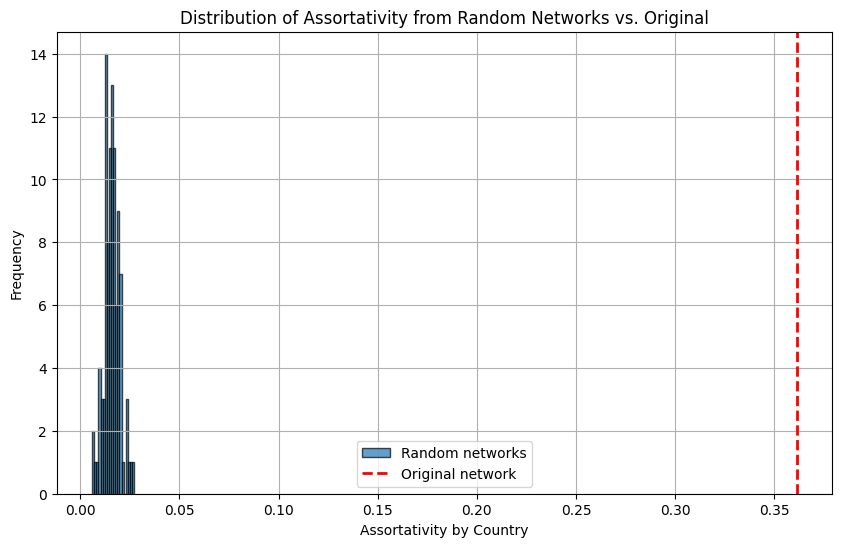

In [55]:
original_ac = r

plt.figure(figsize=(10, 6))
plt.hist(list_of_AC, bins=20, edgecolor='black', alpha=0.7, label='Random networks')
plt.axvline(original_ac, color='red', linestyle='--', linewidth=2, label='Original network')
plt.xlabel("Assortativity by Country")
plt.ylabel("Frequency")
plt.title("Distribution of Assortativity from Random Networks vs. Original")
plt.legend()
plt.grid(True)
plt.show()

> __Exercise 2: Zachary's karate club__: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function [karate_club_graph](https://networkx.org/documentation/stable//auto_examples/graph/plot_karate_club.html)

> 1. Visualize the graph. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below.


In [56]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

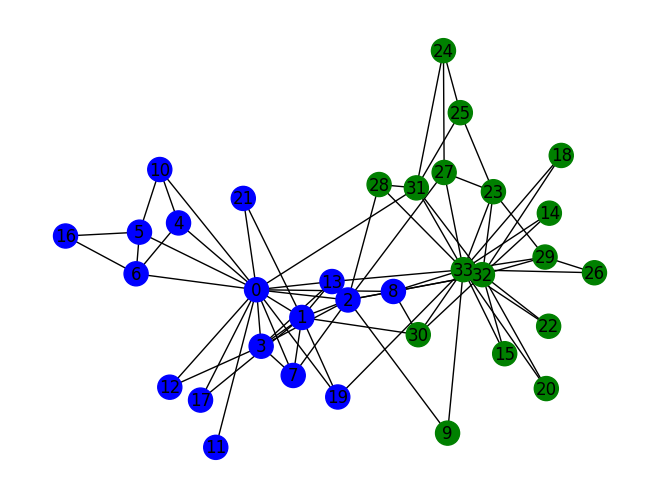

In [57]:
color = nx.get_node_attributes(G, "club")
color

color_map = []
for node in range(len(G)):
    if color[node] == 'Mr. Hi':
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()



> 2. Write a function to compute the __modularity__ of a graph partitioning (use **equation 9.12** in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.


In [58]:
from collections import defaultdict

def modularity(G, partition): 
    '''
    n_c = partitioning
    G = graph
    
    '''
    L = G.size(weight='weight')  # total weight of all edges

    # Organize nodes by community
    community_dict = defaultdict(set)
    for node, comm in nx.get_node_attributes(G, "club").items():
        community_dict[comm].add(node)

    modularity = 0.0

    for community_nodes in community_dict.values():
            subgraph = G.subgraph(community_nodes)

            L_c = subgraph.size(weight='weight')  # Total internal edge weight in community
            k_c = sum(G.degree(n, weight='weight') for n in community_nodes)  # Sum of degrees of nodes in community

            modularity += (L_c / L) - ((k_c / (2 * L)) ** 2)

    return modularity



> 3. Explain in your own words the concept of _modularity_.


ANSWER: Modularity is a way to measure how many communities appears in a network, which could also be called modules hence the name modularity. A community is defined by being a set of nodes which are more highly connected than towards other nodes in the same network, which makes them appear as a group in a visualization of the network. We can seperate networks into different communities ourself by partioning them based on common attributes, and with modularity we can then measure whether or not this split actually creates communties and a good community structure. A high modularity score indicates a better community structure, whereas a low indicates that this is not a way to split the network into modules. 


> 4. Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a [node attribute](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.classes.function.get_node_attributes.html), called _"club"_.


In [59]:
modularity_original_value = modularity(G,"club")
modularity_original_value

0.39143756676224206


> 5. Create $1000$ randomized version of the Karate Club network using the _double edge swap_ algorithm you wrote in the exercise above 5. For each of them, compute the modularity of the "club" split and store it in a list.


In [60]:
import random
import itertools

def double_edge_swap_2(G, num_swaps_multiplier=10):

   # Create a deep copy of the graph
    G_copy = G.copy()
    G_copy = G_copy.to_undirected()

    E = len(G_copy.edges())
    nodes = list(itertools.chain(*list(G_copy.edges())))
    num_swaps = E * num_swaps_multiplier  # Total swaps to perform

    for _ in range(num_swaps): 
        x,u = random.sample(nodes,2)
        v = random.choice(list(G[u]))
        y = random.choice(list(G[x]))

        if u != y and x != v and (u, y) not in G_copy.edges() and (x, v) not in G_copy.edges():
            if (x,y) in G_copy.edges() and (u,v) in G_copy.edges(): 
            # Remove old edges safely 
                G_copy.remove_edge(u, v)
                G_copy.remove_edge(x, y)

                # Add new edges
                G_copy.add_edge(u, y)
                G_copy.add_edge(x, v)

    return G_copy

In [61]:
from tqdm import tqdm

modularity_values = []

for _ in tqdm(range(100)): 
    G_randomized = double_edge_swap_2(G)
    modularity_value = modularity(G_randomized, "club")
    modularity_values.append(modularity_value)

100%|██████████| 100/100 [00:00<00:00, 276.19it/s]



> 6. Compute the average and standard deviation of the modularity for the random network.


In [62]:
import statistics

mean = statistics.mean(modularity_values)
std = statistics.stdev(modularity_values)

mean,std

(0.022835761121616147, 0.0616766494619087)


> 7. Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)).


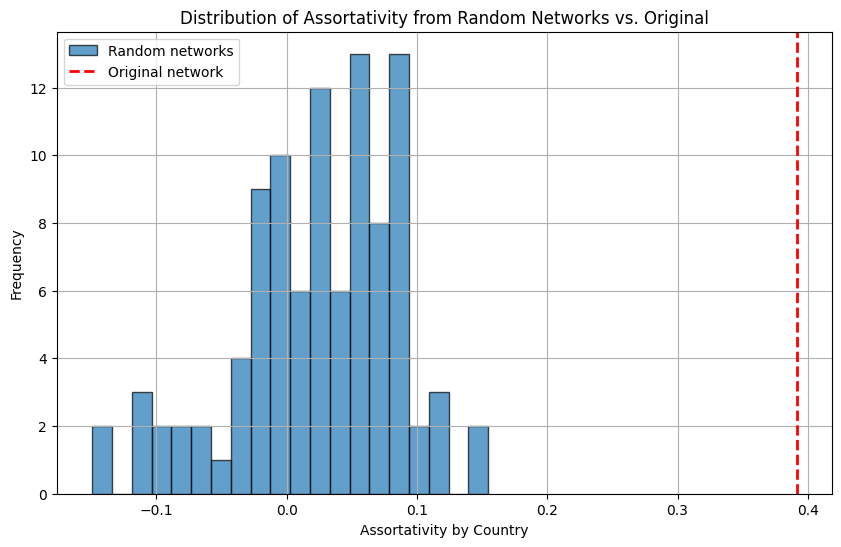

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(modularity_values, bins=20, edgecolor='black', alpha=0.7, label='Random networks')
plt.axvline(modularity_original_value, color='red', linestyle='--', linewidth=2, label='Original network')
plt.xlabel("Assortativity by Country")
plt.ylabel("Frequency")
plt.title("Distribution of Assortativity from Random Networks vs. Original")
plt.legend()
plt.grid(True)
plt.show()


> 8. Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?


ANSWER: The club split is a good way of seperating the network into communities as it has a high modularity score. Especially when we compare with the random networks. Random networks are not supposed to show any modularity as the connection pattern between nodes is expected to be uniform, independent of the networks degree distribution. This means that if the network has a modularity score this is random and happens by chance. If we the compare our calculated score against 100 random networks and ours is significantly higher this indicates that our split and modularity score is not random but an indication of a community structure in the network. In these types of social networks some nodes are more connected then others and by preserving the degree of the nodes we retain the link to reality. By only randomizing who the nodes are linked to and not how many they are linked to, we examine the structure of the networ and whether communities are present. 


> 9.  Use [the Python Louvain-algorithm implementation](https://anaconda.org/auto/python-louvain) to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?


In [64]:
import community.community_louvain as community_louvain


In [65]:
import networkx as nx
# import community as community_louvain  # from python-louvain package
from collections import defaultdict

# Run Louvain algorithm
partition_louvain = community_louvain.best_partition(G)

community_groups = defaultdict(set)
for node, comm_id in partition_louvain.items():
    community_groups[comm_id].add(node)

partition_sets = list(community_groups.values())

# Compute modularity
mod_louvain = modularity(G, partition_sets)

print("Louvain Modularity:", mod_louvain)

Louvain Modularity: 0.39143756676224206


ANSWER: The python louvain-algorithm found the exact same value of modularity as with the club split. The algorithm did not have any knowlegde of the real split in the data and only observed the connections it found in the graph, which indicates that the true split of clubs observed in the data aligns with the community structure present in the nodes in the graph. 


> 10.  Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix **_D_** with dimension (2 times _A_), where _A_ is the number of communities found by Louvain. We set entry _D_(_i_,_j_) to be the number of nodes that community _i_ has in common with group split _j_. The matrix **_D_** is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.

In [66]:
import community.community_louvain as community_louvain


In [67]:
import networkx as nx
#import community as community_louvain  # pip install python-louvain
import numpy as np

# Run Louvain community detection
partition = community_louvain.best_partition(G)

# Map of node to Louvain community
louvain_labels = list(partition.values())
communities = set(louvain_labels)
A = len(communities)

# Create confusion matrix D
D = np.zeros((A, 2), dtype=int)

for node in G.nodes():
    louvain_comm = partition[node]
    club_group = 0 if G.nodes[node]['club'] == 'Mr. Hi' else 1
    D[louvain_comm, club_group] += 1

print("Confusion matrix D:")
print(D)

Confusion matrix D:
[[11  0]
 [ 1 13]
 [ 5  0]
 [ 0  4]]


Row 0: Louvain community 0 has 11 nodes, all from club 0 (Mr. Hi).

Row 1: Louvain community 1
 has 14 nodes — 1 from club 0, 13 from club 1 (mostly Officer).

Row 2: Louvain community 2 has 5 nodes, all from club 0 (Mr. Hi).

Row 3: Louvain community 3 has 4 nodes, all from club 1 (Officer).

ANSWER: The algorithm determines there to be 4 communities in the data whereas we know there are only two clubs, however we can see that these extra two communties are almost only found within each of the clubs. This means that each club-communitie further contains two sub-communities, but as these sub-communtities are not across the two different clubs, the club split partitioning is still applicable. 

## Part 3 - Words that characterize Computational Social Science communities

These exercises are taken from Week 8
> __Exercise 1: TF-IDF and the Computational Social Science communities.__ The goal for this exercise is to find the words charachterizing each of the communities of Computational Social Scientists.
> What you need for this exercise: 
>    * The assignment of each author to their network community, and the degree of each author (Week 6, Exercise 4). This can be stored in a dataframe or in two dictionaries, as you prefer.  
>    * the tokenized _abstract_ dataframe (Week 7, Exercise 2)
>
> 1. First, check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). Explain in your own words the point of TF-IDF. 
>   * What does TF stand for? 
>   * What does IDF stand for?


ANSWER:
TF stands for term frequency and it measures how often a term appears in a document. It is calculated by taking the count of the term in the document divided by the total amount of terms. IDF stands for Inverse Document Frequency and it measure how much information the term provides by measuring how common the term is across multiple documents. 
TF-IDF combindes these two methods to measure how important a term is for a given document in a collection of documents. It adjust for the fact that some words are just generally more common than others. It is helpful to highlight terms which are frequent in one document but rare in the collection. 


> 2. Now, we want to find out which words are important for each *community*, so we're going to create several ***large documents, one for each community***. Each document includes all the tokens of abstracts written by members of a given community. 
>   * Consider a community _c_
>   * Find all the abstracts of papers written by a member of community _c_.
>   * Create a long array that stores all the abstract tokens 
>   * Repeat for all the communities. 
> __Note:__ Here, to ensure your code is efficient, you shall exploit ``pandas`` builtin functions, such as [``groupby.apply``](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.apply.html) or [``explode``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).


In [68]:
import json
from collections import defaultdict
import networkx as nx
import community as community_louvain 
from collections import defaultdict
import pandas as pd
import numpy as np
import ast

#### Load datasets and create dataframe with community and degrees

In [69]:
# Load the JSON file
with open("final_network.json", "r") as f:
    graph_data = json.load(f)

# Convert JSON back to NetworkX graph
G = nx.json_graph.node_link_graph(graph_data, edges="links", directed = False)

with open("louvain_partition.json", "r") as f:
    loaded_partition = json.load(f)

In [70]:
# Get degrees
degrees = dict(G.degree())

# Create DataFrame
df = pd.DataFrame({
    "Author": list(loaded_partition.keys()),
    "Community": list(loaded_partition.values()),
    "Degree": [degrees[node] for node in loaded_partition.keys()]
    })
df

,Author,Community,Degree
0,https://openalex.org/A5067008528,0,6
1,https://openalex.org/A5022754313,0,25
2,https://openalex.org/A5044056170,0,4
3,https://openalex.org/A5012701585,0,17
4,https://openalex.org/A5071496598,0,15
...,...,...,...
14755,https://openalex.org/A5100431699,87,4
14756,https://openalex.org/A5101877341,87,4
14757,https://openalex.org/A5108625853,1,1
14758,https://openalex.org/A5047601648,29,1


#### Check the number of communities

In [71]:
#Unique values present in the 'Community' column:
unique_communities = df['Community'].unique()

print(np.sort(unique_communities))
len(unique_communities)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167]


168

#### Load final paper dataset and abstract dataset with tokens

In [72]:
papers = pd.read_csv("final_papers.csv")
papers

,id,publication_year,cited_by_count,author_ids
0,https://openalex.org/W3129422154,2021,189,"['https://openalex.org/A5067008528', 'https://..."
1,https://openalex.org/W4392375089,2024,12,"['https://openalex.org/A5022754313', 'https://..."
2,https://openalex.org/W3087570498,2020,124,"['https://openalex.org/A5069473136', 'https://..."
3,https://openalex.org/W2905008240,2018,90,"['https://openalex.org/A5034327826', 'https://..."
4,https://openalex.org/W3129992849,2021,56,"['https://openalex.org/A5022754313', 'https://..."
...,...,...,...,...
35540,https://openalex.org/W1529149406,2001,40,"['https://openalex.org/A5078136609', 'https://..."
35541,https://openalex.org/W175605978,1994,21,"['https://openalex.org/A5078136609', 'https://..."
35542,https://openalex.org/W2036131512,2008,120,"['https://openalex.org/A5083811020', 'https://..."
35543,https://openalex.org/W2009589362,2009,86,"['https://openalex.org/A5083674230', 'https://..."


In [74]:
abstracts = pd.read_csv("abstracts_with_collocations.csv")
abstracts

,id,title,abstract_inverted_index,text,tokens
0,https://openalex.org/W3129422154,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
1,https://openalex.org/W4392375089,An experimental manipulation of the value of e...,NaN,NaN,[]
2,https://openalex.org/W3087570498,The impact of COVID-19 on the gender division ...,"{'As': [0], 'most': [1, 161], 'other': [2], 'E...","As most other EU countries, Hungary implemente...","['eu', 'countries', 'hungary', 'implemented', ..."
3,https://openalex.org/W2905008240,The strength of long-range ties in population-...,"{'The': [0], 'strength': [1], 'of': [2, 80], '...",The strength of long-range ties It seems reaso...,"['strength', 'longrange', 'ties', 'seems', 're..."
4,https://openalex.org/W3129992849,Promises and Perils of Experimentation: The Mu...,"{'Researchers': [0], 'run': [1], 'experiments'...","Researchers run experiments to test theories, ...","['researchers', 'run', 'experiments', 'test', ..."
...,...,...,...,...,...
35535,https://openalex.org/W1529149406,Three Companions for Data Mining in First Orde...,NaN,NaN,[]
35536,https://openalex.org/W175605978,Applications of a logical discovery engine,"{'The': [0], 'clausal': [1, 34, 41], 'discover...",The clausal discovery engine CLAUDIEN is prese...,"['clausal', 'discovery', 'engine', 'claudien',..."
35537,https://openalex.org/W2036131512,The bandwagon effect of collaborative filterin...,"{'Advancements': [0], 'in': [1, 9], 'collabora...",Advancements in collaborative filtering and re...,"['advancements', 'collaborative_filtering', 'r..."
35538,https://openalex.org/W2009589362,Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto..."


In [75]:
abstracts = abstracts.dropna(subset=['abstract_inverted_index'])

#### Merge paper and tokens dataframes


In [77]:
# merge papers and tokens
papers_with_abstract= papers.merge(abstracts, left_on='id', right_on='id')
papers_with_abstract

,id,publication_year,cited_by_count,author_ids,title,abstract_inverted_index,text,tokens
0,https://openalex.org/W3129422154,2021,189,"['https://openalex.org/A5067008528', 'https://...",Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
1,https://openalex.org/W3087570498,2020,124,"['https://openalex.org/A5069473136', 'https://...",The impact of COVID-19 on the gender division ...,"{'As': [0], 'most': [1, 161], 'other': [2], 'E...","As most other EU countries, Hungary implemente...","['eu', 'countries', 'hungary', 'implemented', ..."
2,https://openalex.org/W2905008240,2018,90,"['https://openalex.org/A5034327826', 'https://...",The strength of long-range ties in population-...,"{'The': [0], 'strength': [1], 'of': [2, 80], '...",The strength of long-range ties It seems reaso...,"['strength', 'longrange', 'ties', 'seems', 're..."
3,https://openalex.org/W3129992849,2021,56,"['https://openalex.org/A5022754313', 'https://...",Promises and Perils of Experimentation: The Mu...,"{'Researchers': [0], 'run': [1], 'experiments'...","Researchers run experiments to test theories, ...","['researchers', 'run', 'experiments', 'test', ..."
4,https://openalex.org/W4386387636,2023,26,"['https://openalex.org/A5022754313', 'https://...",High level of correspondence across different ...,"{'Abstract': [0], 'One': [1], 'widely': [2], '...",Abstract One widely used approach for quantify...,"['abstract', 'one', 'widely_used', 'approach',..."
...,...,...,...,...,...,...,...,...
28071,https://openalex.org/W3105206394,2006,96,"['https://openalex.org/A5078136609', 'https://...",Logical Hidden Markov Models,"{'Logical': [0], 'hidden': [1, 7, 46], 'Markov...",Logical hidden Markov models (LOHMMs) upgrade ...,"['logical', 'hidden_markov', 'models', 'lohmms..."
28072,https://openalex.org/W175605978,1994,21,"['https://openalex.org/A5078136609', 'https://...",Applications of a logical discovery engine,"{'The': [0], 'clausal': [1, 34, 41], 'discover...",The clausal discovery engine CLAUDIEN is prese...,"['clausal', 'discovery', 'engine', 'claudien',..."
28073,https://openalex.org/W2036131512,2008,120,"['https://openalex.org/A5083811020', 'https://...",The bandwagon effect of collaborative filterin...,"{'Advancements': [0], 'in': [1, 9], 'collabora...",Advancements in collaborative filtering and re...,"['advancements', 'collaborative_filtering', 'r..."
28074,https://openalex.org/W2009589362,2009,86,"['https://openalex.org/A5083674230', 'https://...",Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto..."


#### Explode merged dataframe to contain only one author pr. line

In [78]:
#convert authors ids from strings
papers_with_abstract['author_ids'] = papers_with_abstract['author_ids'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [79]:
# explode author ids to only one pr. row
exploded = papers_with_abstract.explode("author_ids")
exploded

,id,publication_year,cited_by_count,author_ids,title,abstract_inverted_index,text,tokens
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5067008528,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5022754313,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5044056170,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5012701585,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5071496598,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task..."
...,...,...,...,...,...,...,...,...
28073,https://openalex.org/W2036131512,2008,120,https://openalex.org/A5083674230,The bandwagon effect of collaborative filterin...,"{'Advancements': [0], 'in': [1, 9], 'collabora...",Advancements in collaborative filtering and re...,"['advancements', 'collaborative_filtering', 'r..."
28074,https://openalex.org/W2009589362,2009,86,https://openalex.org/A5083674230,Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto..."
28074,https://openalex.org/W2009589362,2009,86,https://openalex.org/A5083811020,Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto..."
28075,https://openalex.org/W2004122274,2012,51,https://openalex.org/A5083674230,Electronic Friend or Virtual Foe: Exploring th...,"{'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...",Industry and scholarly sources both argue that...,"['industry', 'scholarly', 'sources', 'argue', ..."


#### Merge token dataset with dataset containing communities

In [80]:
# include communities
community = exploded.merge(df, left_on='author_ids', right_on='Author')
community


,id,publication_year,cited_by_count,author_ids,title,abstract_inverted_index,text,tokens,Author,Community,Degree
0,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5067008528,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5067008528,0,6
1,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5022754313,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5022754313,0,25
2,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5044056170,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5044056170,0,4
3,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5012701585,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5012701585,0,17
4,https://openalex.org/W3129422154,2021,189,https://openalex.org/A5071496598,Expectations of reward and efficacy guide cogn...,"{'The': [0], 'amount': [1], 'of': [2, 26, 62, ...",The amount of mental effort we invest in a tas...,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5071496598,0,15
...,...,...,...,...,...,...,...,...,...,...,...
76860,https://openalex.org/W2036131512,2008,120,https://openalex.org/A5083674230,The bandwagon effect of collaborative filterin...,"{'Advancements': [0], 'in': [1, 9], 'collabora...",Advancements in collaborative filtering and re...,"['advancements', 'collaborative_filtering', 'r...",https://openalex.org/A5083674230,7,3
76861,https://openalex.org/W2009589362,2009,86,https://openalex.org/A5083674230,Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto...",https://openalex.org/A5083674230,7,3
76862,https://openalex.org/W2009589362,2009,86,https://openalex.org/A5083811020,Authority vs. peer,"{'From': [0], 'the': [1, 6, 9, 14, 70, 87], 'm...",From the most e-mailed stories of the day to t...,"['emailed', 'stories', 'day', 'favorite', 'sto...",https://openalex.org/A5083811020,7,8
76863,https://openalex.org/W2004122274,2012,51,https://openalex.org/A5083674230,Electronic Friend or Virtual Foe: Exploring th...,"{'Industry': [0], 'and': [1, 9, 53, 58, 80, 84...",Industry and scholarly sources both argue that...,"['industry', 'scholarly', 'sources', 'argue', ...",https://openalex.org/A5083674230,7,3


In [81]:
#drop excess columns
columns_to_drop = [
    "id", "publication_year", "cited_by_count", 
    "author_ids", "title", "abstract_inverted_index", "text"
]
final = community.drop(columns=[col for col in columns_to_drop if col in community.columns])
final

,tokens,Author,Community,Degree
0,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5067008528,0,6
1,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5022754313,0,25
2,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5044056170,0,4
3,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5012701585,0,17
4,"['amount', 'mental', 'effort', 'invest', 'task...",https://openalex.org/A5071496598,0,15
...,...,...,...,...
76860,"['advancements', 'collaborative_filtering', 'r...",https://openalex.org/A5083674230,7,3
76861,"['emailed', 'stories', 'day', 'favorite', 'sto...",https://openalex.org/A5083674230,7,3
76862,"['emailed', 'stories', 'day', 'favorite', 'sto...",https://openalex.org/A5083811020,7,8
76863,"['industry', 'scholarly', 'sources', 'argue', ...",https://openalex.org/A5083674230,7,3


#### Convert tokens to strings and create docs with tokens for each community

In [82]:
# Safely convert stringified lists to real lists
final['tokens'] = final['tokens'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [83]:
# Group by community and flatten
community_docs = final.groupby('Community')['tokens'].apply(
    lambda token_lists: [token for sublist in token_lists for token in sublist]
).reset_index(name='community_tokens')

In [84]:
community_docs

,Community,community_tokens
0,0,"[amount, mental, effort, invest, task, influen..."
1,1,"[eu, countries, hungary, implemented, severe, ..."
2,2,"[strength, longrange, ties, seems, reasonable,..."
3,3,"[strength, longrange, ties, seems, reasonable,..."
4,4,"[abstract, one, widely_used, approach, quantif..."
...,...,...
148,163,"[paper_present, recommendation_system, named, ..."
149,164,"[purpose_paper, aims, explore, relationship, c..."
150,165,"[superparamagnetic, feosiotio, peapodlike, nan..."
151,166,"[stokeseinstein, se, relation, pure, liquids, ..."



> 3. Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within the __top 5 communities__ (by number of authors). 
>   * Describe similarities and differences between the communities.
>   * Why aren't the TFs not necessarily a good description of the communities?
>   * Next, we calculate IDF for every word. 
>   * What base logarithm did you use? Is that important?


#### Count number of authors in each community

In [85]:
#group by number of authors
author_counts = final.groupby('Community')['Author'].nunique().reset_index(name='num_authors')

In [86]:
author_counts

,Community,num_authors
0,0,366
1,1,305
2,2,214
3,3,360
4,4,488
...,...,...
148,163,2
149,164,7
150,165,18
151,166,6


In [87]:
top_communities = author_counts.sort_values(by='num_authors', ascending=False)
top_communities.head(10)

,Community,num_authors
7,7,1267
12,12,663
9,9,650
16,16,493
26,26,489
4,4,488
30,30,424
11,11,393
17,17,383
0,0,366


#### Filter for top 5 communities and count their most frequent terms

In [88]:
# Filter only those communities
top_5_communities = [7,12,9,26,4]
top_5_docs = community_docs[community_docs['Community'].isin(top_5_communities)].reset_index(drop=True)
top_5_docs

,Community,community_tokens
0,4,"[abstract, one, widely_used, approach, quantif..."
1,7,"[abstract, generative, artificial_intelligence..."
2,9,"[text, generated, large_language, models, prol..."
3,12,"[worlds, digital, information, ecosystem, cont..."
4,26,"[widespread, use, artificial_intelligence, ai_..."


In [89]:
from collections import Counter

# Add term frequencies per community
top_5_docs['term_freq'] = top_5_docs['community_tokens'].apply(Counter)

#Top 5 tokens for each community
for i, row in top_5_docs.iterrows():
    top_terms = row['term_freq'].most_common(5)
    print(f"Community {row['Community']} – Top Terms: {top_terms}")


Community 4 – Top Terms: [('information', 1387), ('people', 1134), ('model', 1049), ('research', 1035), ('data', 1015)]
Community 7 – Top Terms: [('users', 3802), ('use', 3146), ('data', 3020), ('design', 2879), ('work', 2807)]
Community 9 – Top Terms: [('models', 2448), ('model', 2279), ('task', 2207), ('data', 1645), ('using', 1502)]
Community 12 – Top Terms: [('users', 3354), ('information', 2042), ('data', 1939), ('network', 1895), ('networks', 1685)]
Community 26 – Top Terms: [('data', 1947), ('information', 1646), ('users', 1481), ('model', 1384), ('network', 1147)]


>   * Describe similarities and differences between the communities. $\newline$
ANSWER: Information/data/research is present in all 5 communities. Likewise network/model and people/users are also present in almost all communities. There are no big differences between the communities, and they are actually very similiar, but given the context of the communities, which is that they are formed by computational scientist it makes sense that these 3 categories of words would be the most used in their papers.

>   * Why aren't the TFs not necessarily a good description of the communities? $\newline$
ANSWER: The communities are based on the same type of people - computational social scientist - and their papers. Therefore, it is to be expected that their papers would have a lot of the same words as their most frequent terms, because a lot of these papers probably use the same methods in their research and structure in the writing of the reports. Therefore, the actual topics of the papers might not be the most used terms which makes it hard to seperate the communities from one another as they share a common field. 

#### Calculate IDF

In [90]:
import math
# Count how many communities each word appears in
word_in_communities = Counter()

for tokens in top_5_docs['community_tokens']:
    unique_words = set(tokens)
    for word in unique_words:
        word_in_communities[word] += 1

# Total number of communities (for IDF base)
N = len(top_5_docs)

# Compute IDF using log base 10
idf_scores = {
    word: math.log10(N / count)
    for word, count in word_in_communities.items()
}

idf_scores

{'webbased': 0.0,
 'suppose': 0.2218487496163564,
 'brochure': 0.2218487496163564,
 'retweet': 0.0,
 'doin': 0.6989700043360189,
 'concluded': 0.09691001300805642,
 'frequency': 0.0,
 'provided': 0.0,
 'contextual': 0.0,
 'strips': 0.2218487496163564,
 'equipment': 0.0,
 'enforce': 0.0,
 'pachur': 0.6989700043360189,
 'untrained': 0.2218487496163564,
 'flux': 0.09691001300805642,
 'statedriven': 0.6989700043360189,
 'nonnegative': 0.0,
 'meal': 0.3979400086720376,
 'obviate': 0.3979400086720376,
 'raceethnicity': 0.09691001300805642,
 'gaissmaiermpibberlinmpgde': 0.6989700043360189,
 'amnesic': 0.6989700043360189,
 'reveals': 0.0,
 'enabling': 0.0,
 'samples': 0.0,
 'fixed': 0.0,
 'nonvanishing': 0.3979400086720376,
 'received': 0.0,
 'conceptualization': 0.3979400086720376,
 'uncertaintyreduction': 0.6989700043360189,
 'integrity': 0.0,
 'seemed': 0.09691001300805642,
 'retention': 0.0,
 'bi': 0.6989700043360189,
 'movements': 0.0,
 'young_people': 0.0,
 'murdock': 0.6989700043360189,

>   * What base logarithm did you use? Is that important? $\newline$
ANSWER: We used Log base 10, which is a common choice. We could have used Log base 2 or Ln which would change the scale they are measured on, but it will have no effect on the actual ranking. 


> 4. We're ready to calculate TF-IDF. Do that for the __top 9 communities__ (by number of authors). Then for each community: 
>   * List the 10 top TF words 
>   * List the 10 top TF-IDF words
>   * List the top 3 authors (by degree)
>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative?



In [91]:
# Filter only top 9 communities
top_9_communities = [7,12,9,26,4,16,30,11,17]
top_9_docs = community_docs[community_docs['Community'].isin(top_9_communities)].reset_index(drop=True)
top_9_docs

,Community,community_tokens
0,4,"[abstract, one, widely_used, approach, quantif..."
1,7,"[abstract, generative, artificial_intelligence..."
2,9,"[text, generated, large_language, models, prol..."
3,11,"[abstract, unprecedented, behavioural, respons..."
4,12,"[worlds, digital, information, ecosystem, cont..."
5,16,"[fake_news, sharing, rare, significantly, comm..."
6,17,"[abstract, large_scale, mobility_data, become_..."
7,26,"[widespread, use, artificial_intelligence, ai_..."
8,30,"[decision_makers, often, want, target, interve..."


#### List top 10 terms for each community in the top 9

In [92]:
# Add term frequencies per community
top_9_docs['term_freq'] = top_9_docs['community_tokens'].apply(Counter)

#Top 10  for each community
for i, row in top_9_docs.iterrows():
    top_terms = row['term_freq'].most_common(10)
    only_words = [word for word, count in top_terms]
    print(f"Community {row['Community']} – Top Terms: {only_words}")


Community 4 – Top Terms: ['information', 'people', 'model', 'research', 'data', 'participants', 'survey', 'models', 'use', 'study']
Community 7 – Top Terms: ['users', 'use', 'data', 'design', 'work', 'people', 'using', 'information', 'research', 'online']
Community 9 – Top Terms: ['models', 'model', 'task', 'data', 'using', 'text', 'tasks', 'show', 'use', 'performance']
Community 11 – Top Terms: ['model', 'network', 'networks', 'find', 'study', 'time', 'dynamics', 'distribution', 'users', 'data']
Community 12 – Top Terms: ['users', 'information', 'data', 'network', 'networks', 'social', 'model', 'content', 'different', 'using']
Community 16 – Top Terms: ['political', 'data', 'information', 'using', 'find', 'research', 'study', 'effects', 'policy', 'survey']
Community 17 – Top Terms: ['model', 'dynamics', 'models', 'data', 'systems', 'individuals', 'population', 'may', 'using', 'system']
Community 26 – Top Terms: ['data', 'information', 'users', 'model', 'network', 'research', 'differen

#### Calculate IDF

In [93]:
# Count how many communities each word appears in
word_in_communities = Counter()

for tokens in top_9_docs['community_tokens']:
    unique_words = set(tokens)
    for word in unique_words:
        word_in_communities[word] += 1

# Total number of communities (for IDF base)
N = len(top_9_docs)

# Compute IDF using log base 10
idf_scores = {
    word: math.log10(N / count)
    for word, count in word_in_communities.items()
}

idf_scores

{'webbased': 0.0,
 'suppose': 0.25527250510330607,
 'brochure': 0.47712125471966244,
 'retweet': 0.10914446942506807,
 'doin': 0.9542425094393249,
 'concluded': 0.10914446942506807,
 'frequency': 0.0,
 'provided': 0.0,
 'contextual': 0.0,
 'strips': 0.47712125471966244,
 'equipment': 0.0,
 'enforce': 0.05115252244738129,
 'pachur': 0.9542425094393249,
 'untrained': 0.3521825181113625,
 'flux': 0.05115252244738129,
 'statedriven': 0.9542425094393249,
 'nonnegative': 0.05115252244738129,
 'meal': 0.6532125137753437,
 'obviate': 0.6532125137753437,
 'raceethnicity': 0.10914446942506807,
 'gaissmaiermpibberlinmpgde': 0.9542425094393249,
 'amnesic': 0.6532125137753437,
 'reveals': 0.0,
 'enabling': 0.0,
 'samples': 0.0,
 'fixed': 0.0,
 'nonvanishing': 0.47712125471966244,
 'received': 0.0,
 'conceptualization': 0.25527250510330607,
 'uncertaintyreduction': 0.9542425094393249,
 'integrity': 0.05115252244738129,
 'seemed': 0.25527250510330607,
 'retention': 0.05115252244738129,
 'bi': 0.95424

#### Calculate TFIDF

In [94]:
def compute_tfidf(tf_counter):
    return {word: tf * idf_scores.get(word, 0) for word, tf in tf_counter.items()}

top_9_docs['tfidf'] = top_9_docs['term_freq'].apply(compute_tfidf)


#### List TFIDF for top 10 terms pr. community

In [95]:
for i, row in top_9_docs.iterrows():
    top_tfidf = sorted(row['tfidf'].items(), key=lambda x: x[1], reverse=True)[:10]
    print(f"Community {row['Community']} – Top TF-IDF Terms:")
    for term, score in top_tfidf:
        print(f"  {term}: {score:.4f}")
    print()


Community 4 – Top TF-IDF Terms:
  web_surveys: 119.2803
  inoculation: 97.9819
  recognition_heuristic: 90.1433
  iab: 68.7055
  judgment: 64.4494
  wmc: 63.3616
  reactance: 61.0715
  frugal: 58.2088
  gigerenzer: 56.8295
  risktaking: 52.9605

Community 7 – Top TF-IDF Terms:
  hci: 145.6275
  transactive_memory: 107.8294
  qmr: 107.8294
  cscw: 93.3284
  hcid: 84.9276
  vr: 82.4107
  blind: 74.5396
  microtasks: 73.4767
  nec: 70.6139
  palo_alto: 69.1826

Community 9 – Top TF-IDF Terms:
  machine_translation: 83.8194
  question_answering: 71.7316
  commonsense: 68.9236
  fewshot: 67.2741
  coreference: 61.5486
  qa: 61.5207
  counterspeech: 57.2546
  llms: 56.7014
  arabic: 56.4152
  memorization: 55.5231

Community 11 – Top TF-IDF Terms:
  percolation: 125.9600
  exponent: 45.6076
  growth_rates: 43.1411
  zipf: 43.1120
  phase_transition: 40.3331
  conspiracy: 39.5672
  deltat: 39.1239
  rds: 36.2612
  tails: 35.7841
  interbank: 34.6203

Community 12 – Top TF-IDF Terms:
  persona

#### List top 3 authors

In [96]:
authors = pd.read_csv("final_authors.csv")
authors_merge = authors.merge(df,left_on="id", right_on="Author")

In [99]:
top_communities = [7, 12, 9, 26, 4, 16, 30, 11, 17]

# Filter for communities
filtered = authors_merge[authors_merge['Community'].isin(top_communities)]

top_authors = (
    filtered.sort_values(by='Degree', ascending=False)
            .drop_duplicates(subset=['Community', 'Author'])
            .groupby('Community')
            .head(3)
            .sort_values(['Community', 'Degree'], ascending=[True, False])
)

# Display results
print(top_authors[['Community', 'display_name', 'Degree']].to_string(index=False))


 Community            display_name  Degree
         4     Stephan Lewandowsky     189
         4           Ralph Hertwig     144
         4     Daniel G. Goldstein      76
         7            Eric Horvitz     220
         7    Michael S. Bernstein     180
         7      Jeffrey T. Hancock     178
         9            Dan Jurafsky     189
         9    Chris Callison-Burch     109
         9               Diyi Yang     100
        11   Luı́s A. Nunes Amaral     118
        11       H. Eugene Stanley      93
        11        Frank Schweitzer      76
        12         Filippo Menczer     123
        12         Kristina Lerman     118
        12         Daniele Quercia      94
        16             David Lazer     108
        16     Mauricio Santillana      70
        16        Joshua A. Tucker      68
        17          Simon A. Levin     277
        17            Johan Bollen      63
        17      Taylor H. Ricketts      58
        26               Ying Ding     158
        26 

>   * Are these 10 words more descriptive of the community? If yes, what is it about IDF that makes the words more informative? $\newline$
ANSWER: These words are definitely more informative about what the different papers are about. IDF takes into consideration how often the terms appear in the other documents in the collection, and there the selected terms are terms that appear often in the document but rarely in the collection. This of course makes the terms more informative about the paper. 


 __Exercise 2: The Wordcloud__. It's time to visualize our results!

> * Install the [`WordCloud`](https://pypi.org/project/wordcloud/) module. 
> * Now, create word-cloud for each community. Feel free to make it as fancy or non-fancy as you like.
> * Make sure that, together with the word cloud, you print the names of the top three authors in each community (see my plot above for inspiration). 
> * Comment on your results. What can you conclude on the different sub-communities in Computational Social Science? 
> * Look up online the top author in each community. In light of your search, do your results make sense?

As we have 153 communities, we visualize for the top 9 communities, but by exchanging top_9_docs with community_docs, we would get a visualization for every community.

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Stephan Lewandowsky
      Ralph Hertwig
Daniel G. Goldstein


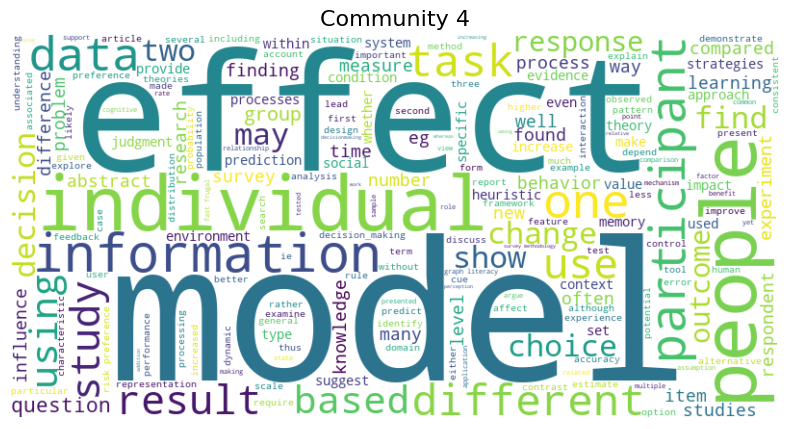

        Eric Horvitz
Michael S. Bernstein
  Jeffrey T. Hancock


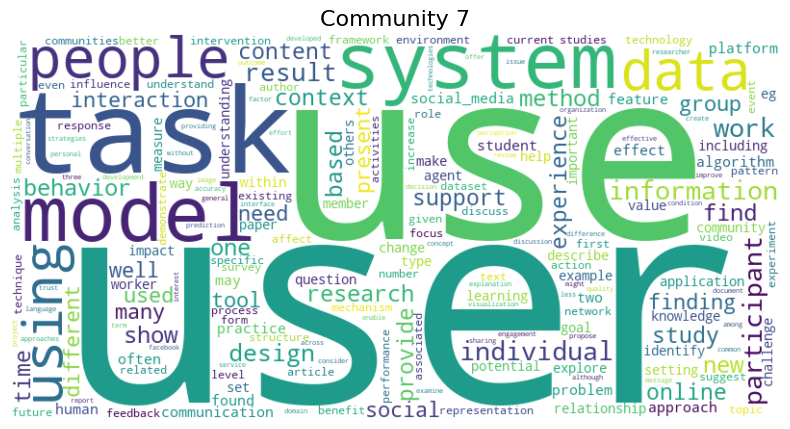

        Dan Jurafsky
Chris Callison-Burch
           Diyi Yang


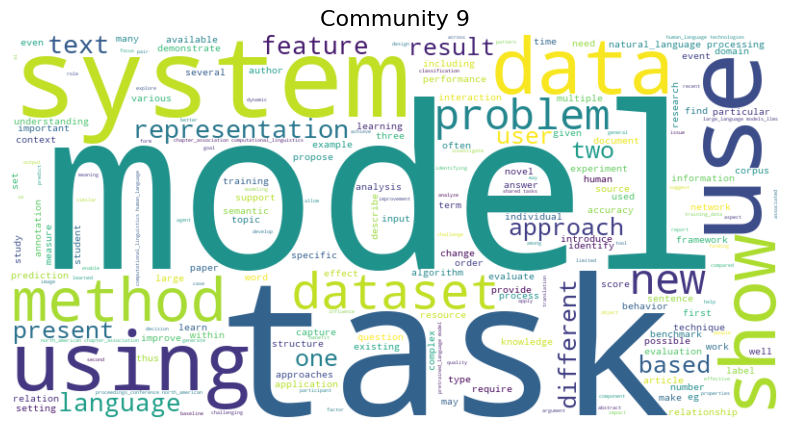

Luı́s A. Nunes Amaral
    H. Eugene Stanley
     Frank Schweitzer


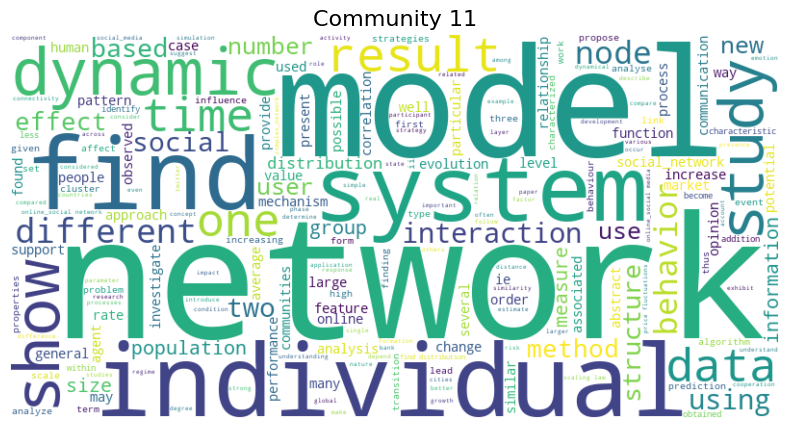

Filippo Menczer
Kristina Lerman
Daniele Quercia


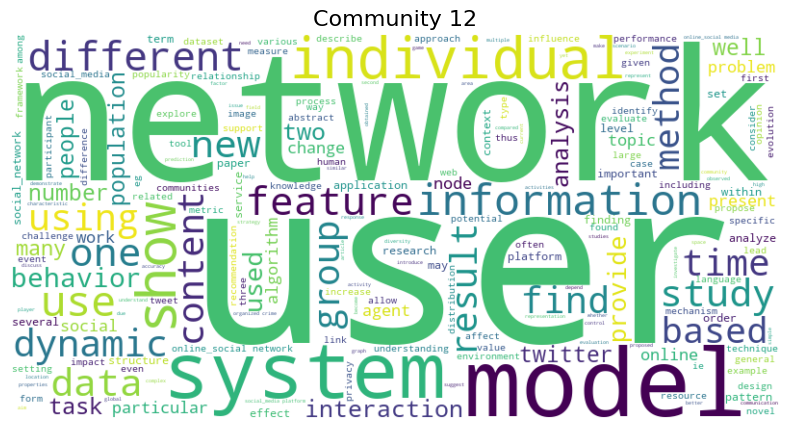

        David Lazer
Mauricio Santillana
   Joshua A. Tucker


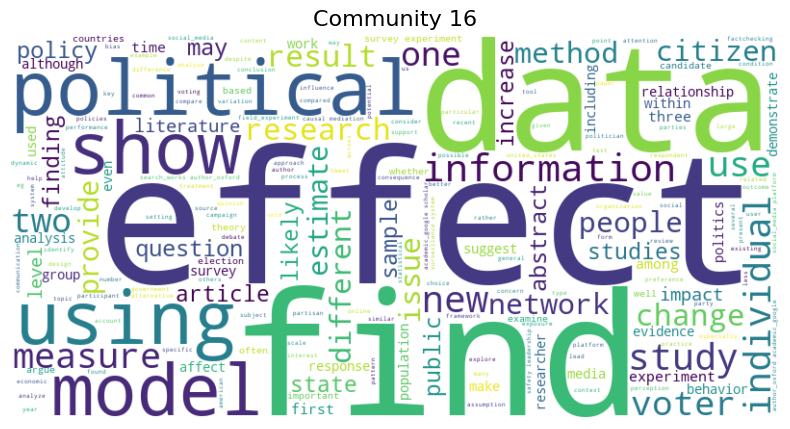

    Simon A. Levin
      Johan Bollen
Taylor H. Ricketts


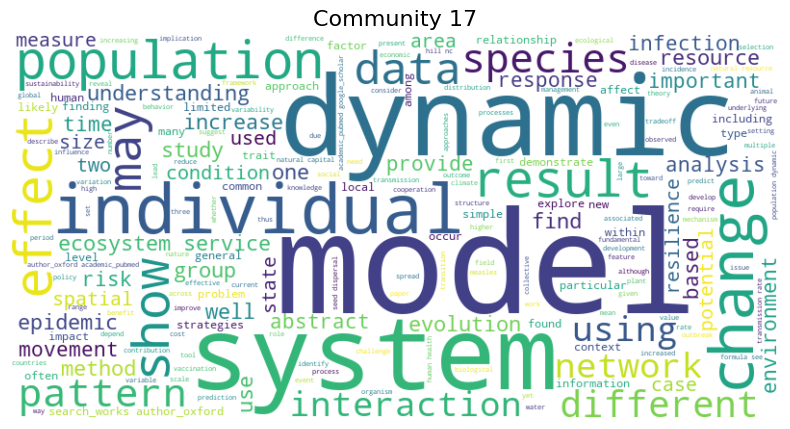

Ying Ding
 Hao Peng
  Nan Cao


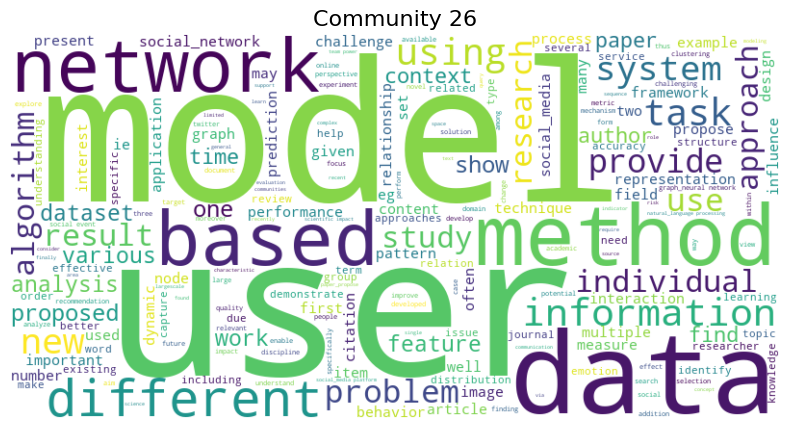

             Lyle Ungar
Sharath Chandra Guntuku
    Gabriella M. Harari


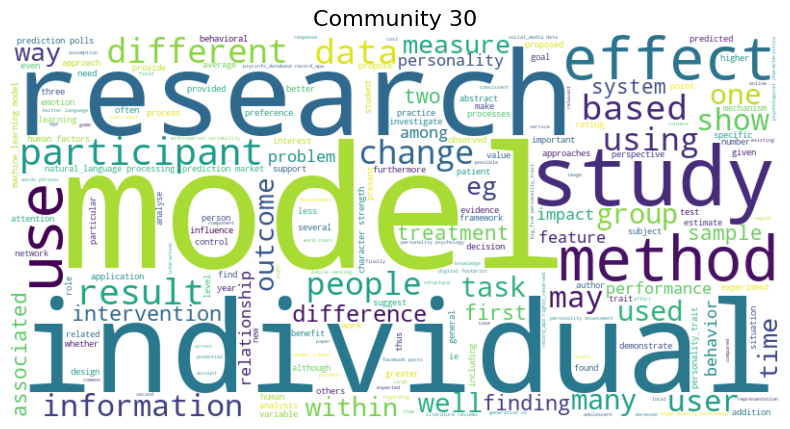

In [101]:
for i, row in top_9_docs.iterrows():
    community_id = row['Community']
    tokens = row['community_tokens']

    # Join tokens into a single string
    text = ' '.join(tokens)

    # Create the word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Get top 3 authors by Degree in this community
    top_authors = (
        authors_merge[authors_merge['Community'] == community_id]
        .sort_values(by='Degree', ascending=False)
        .drop_duplicates(subset='Author')
        .head(3)
    )

    print(top_authors["display_name"].to_string(index=False))

    # Display it
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Community {community_id}', fontsize=16)
    plt.show()


 __Exercise 3: Computational Social Science__ 

> * Go back to Week 1, Exercise 1. Revise what you wrote on the topics in Computational Social Science. 
> * In light of your data-driven analysis, has your understanding of the field changed? How? __(max 150 words)__

ANSWER: Yes, our understanding has definitely changed throughout this analysis. Initially we assumes that computational social science was primarily focused solely on sociology, psychology and the social behavior of people, but now we see it less about the topic and more about techniques or method of researching such as text mining, network analysis and so on, where the field can be many different areas. A key insight here has been regarding the data as the data is the central focus point in computational science. with the data comes important questions like where we get it, if we have to create it ourself and how we most optimally use the it to answer or explore our hypothesis.  